##  *Statistics coded:* Quarterly national accounts - GDP and employment

Prepared by [**Hatem Alharazin**](hatemjamil.89@gmail.com) (EMOS).

This notebook aims at illustrating the Statistics Explained article on [Quarterly national accounts](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Quarterly_national_accounts_-_GDP_and_employment#Data_sources).

## Setting Packages up

In [5]:
# install.packages(...)
library(ggplot2)
library(tseries)
library(readxl)

## GDP and Employment growth rate

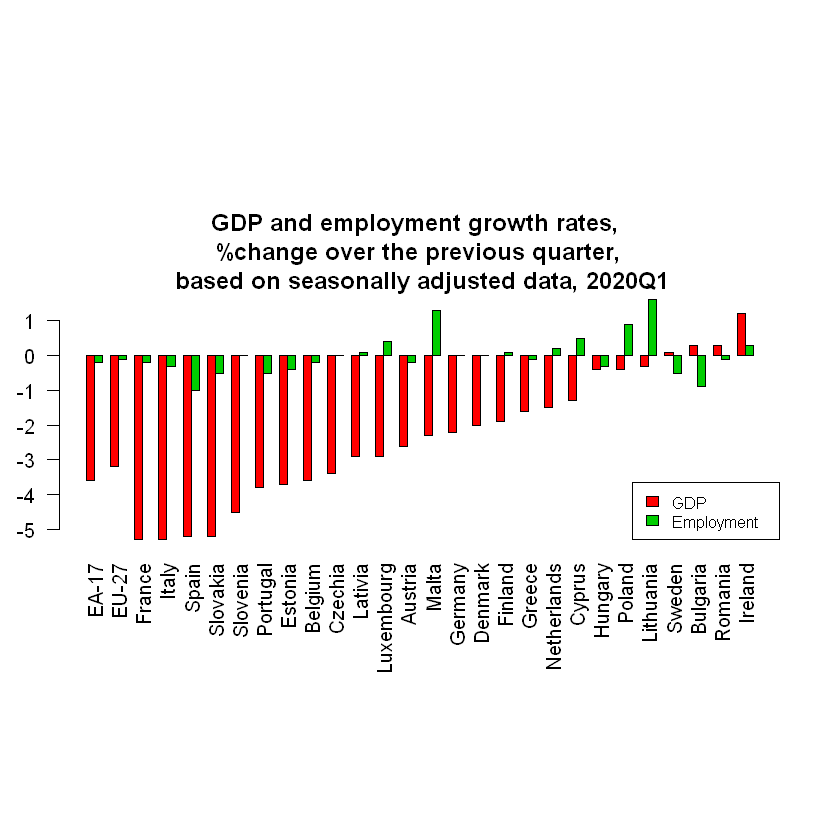

In [4]:
GR_Data <- read_excel("~/Eurostatdataset/GDP_Emp.xlsx", 
    sheet = "Sheet3")
GR_Data <- as.matrix(GR_Data[,2:ncol(GR_Data)])
par(pin=c(6,2))
barplot(GR_Data, las = 2, beside = T, col = c(2,3), main = "GDP and employment growth rates, \n %change over the previous quarter, \n based on seasonally adjusted data, 2020Q1")
legend("bottomright", legend =c("GDP","Employment"), fill = c(2,3), box.lty = 1, cex = 0.8)

#Growth_rate_data <- read.csv("~/Eurostatdataset/GDP_Emp.csv")
#p <- ggplot(data=Growth_rate_data, aes(x=name, y=value, fill=Indicator)) +
#geom_bar(stat="identity", color="black", position=position_dodge())+
#  theme_minimal()
#p + theme(axis.text.x = element_text(angle = 90))


# Quarterly GDP growth

We simply "reproduce" the layout of the article here: the (sub)sections of this notebook shall match the (sub)sections of the article, *e.g.* this section matches the [Population](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Statistics_on_European_cities/fr#Population) section of the *Statistics Explained* article.

Note that your can insert *LaTeX* formula into your text, *e.g.*: 
$$\int {x^n } dx = \frac{{x^{n + 1} }}{{n + 1}}, \quad n \ne  - 1$$

In [3]:
x <- c(1:100)


### Conditions socio-économiques

*Ibid*, the code here will help reproducing the material presented in the section [Conditions socio-économiques](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Statistics_on_European_cities/fr#Conditions_socio-.C3.A9conomiques).

In [ ]:
# your code

Don't forget to explain what you are doing...

### Additional material

At this stage, it is up to you to extend the work presented in the notebook with further analysis/visualisation you deem relevant. 

# GDP growth by Member State

# GDP components and contributions to growth

# Quarterly employment growth

# Employment growth by Member State

# Employment levels

# Labour productivity